In [157]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix


In [109]:
#somatic_male_11.5_G1only from this notebook: https://github.com/ventolab/HGDA/blob/main/mouse_scRNAseq/trajectories/trj_cellRank1_somatic_male_11.5_G1only.ipynb
my_sample = 'HCA_Mou_10827183/'
data_path = '../data/mouse_somatic.h5ad'
adata = sc.read(data_path)





In [122]:
test = adata[adata.obs['sample'].isin(['HCA_Mou_10827183'])]
test2 = test[test.obs['phase'].isin(['G1'])]
test3 = test2[test2.obs['sex'].isin(['Male'])]
test4 = test3[test3.obs['stage'].isin(['11.5'])]
data = test2[test2.obs['celltype'].isin(['Sertoli', 'CoelEpi_Lhx9', 'early_supporting', 'Gi', 'sPAX8'])]

In [143]:
hvg = np.array(data.var['highly_variable-Sanger'].tolist()) == 'True'

In [124]:
umap = data.obsm['X_umap']
clusters = data.obs['celltype'].values.tolist()
num_clusts = len(np.unique(clusters))

In [125]:
df = pd.DataFrame({'x1': umap[:, 0], 'x2': umap[:, 1], 'labels':clusters})

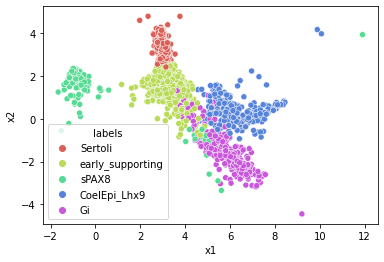

In [126]:
ax = sns.scatterplot(x='x1',y='x2',hue='labels',palette=sns.color_palette("hls",num_clusts),data=df, legend=True)


In [31]:
len(np.unique(clusters))

13

In [105]:
data

View of AnnData object with n_obs × n_vars = 1825 × 24482
    obs: 'n_genes', 'sample', 'stage', 'sex', 'location', 'percent_mito', 'n_counts', 'batch', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'lineage', 'lineageSomatic'
    var: 'gene_ids-0', 'feature_types-0', 'n_cells-0', 'gene_ids-1', 'feature_types-1', 'n_cells-1', 'gene_ids-10', 'feature_types-10', 'n_cells-10', 'gene_ids-11', 'feature_types-11', 'n_cells-11', 'gene_ids-2', 'feature_types-2', 'n_cells-2', 'gene_ids-3', 'feature_types-3', 'n_cells-3', 'gene_ids-4', 'feature_types-4', 'n_cells-4', 'gene_ids-5', 'feature_types-5', 'n_cells-5', 'gene_ids-6', 'feature_types-6', 'n_cells-6', 'gene_ids-7', 'feature_types-7', 'n_cells-7', 'gene_ids-8', 'feature_types-8', 'n_cells-8', 'gene_ids-9', 'feature_types-9', 'n_cells-9', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'ccgs', 'hvg', 'lineageSo

In [158]:
test5 = data[:,hvg]
X = np.array(test5.X).todense()

AttributeError: 'numpy.ndarray' object has no attribute 'todense'

In [149]:
pd.DataFrame(test5.X).to_csv("../data/mouse-gonad-hvg.csv")

In [152]:
pd.DataFrame(clusters).to_csv("../data/mouse-gonad-clusters.csv")

In [166]:
X

array(<1840x2000 sparse matrix of type '<class 'numpy.float32'>'
	with 581203 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [167]:
test5.write_csvs("mouse-gonad-hvg.csv", skip_data=False)

writing .csv files to mouse-gonad-hvg
